In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC  # support vector classifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from matplotlib.colors import ListedColormap


In [3]:
df = pd.read_csv("Social_Network_Ads.csv")
df.head()

Age  EstimatedSalary  Purchased
0   19            19000          0
1   35            20000          0
2   26            43000          0
3   27            57000          0
4   19            76000          0

In [4]:
# check basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [5]:
# check the missing values
print("missing values: ", df.isnull().sum())

missing values:  Age                0
EstimatedSalary    0
Purchased          0
dtype: int64


In [7]:
# Plot age vs estimated salary based on purchase decision
# shows age and salary influance purchase decision visually.
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x="Age", y="EstimatedSalary", hue="Purchased", palette="coolwarm")
plt.title("Age vs Estimated Salary (Before Training)")
plt.show()



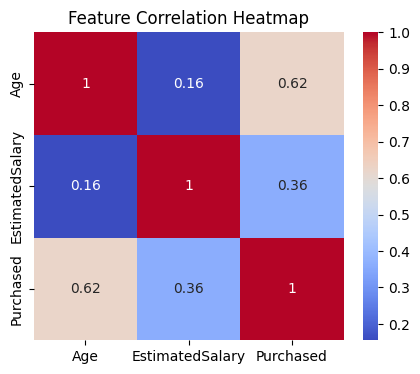

In [8]:
# Correlation heatmap --> heatmap helps you understand relationship between variables
plt.figure(figsize=(5,4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


In [9]:
# split dataset into features and target
X = df[['Age','EstimatedSalary']].values
y = df[['Purchased']]

# Split the dataset into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])

Training samples: 320
Testing samples: 80


In [11]:
# Feature Scaling 
# Standard features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Train the SVM Classifier

In [13]:
# Train the SVM Classifier
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train_scaled, y_train)


c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(random_state=42)

In [16]:
# Evaluation the Model

# Predictions
y_pred = svm_model.predict(X_test_scaled)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {acc*100:.2f}%")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - SVM Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print("\n Classification Report:\n")
print(classification_report(y_test, y_pred))


Model Accuracy: 90.00%



 Classification Report:

              precision    recall  f1-score   support

           0       0.94      0.90      0.92        51
           1       0.84      0.90      0.87        29

    accuracy                           0.90        80
   macro avg       0.89      0.90      0.89        80
weighted avg       0.90      0.90      0.90        80



#### Decision Boundary Visualization (Training Set)

In [19]:
# Make sure y_train is 1D
y_train = np.ravel(y_train)

# Function to plot decision boundary
def plot_decision_boundary(model, X, y, title):
    X1, X2 = np.meshgrid(
        np.arange(start=X[:, 0].min() - 1, stop=X[:, 0].max() + 1, step=0.01),
        np.arange(start=X[:, 1].min() - 1, stop=X[:, 1].max() + 1, step=0.01)
    )
    plt.contourf(
        X1, X2,
        model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
        alpha=0.75,
        cmap=ListedColormap(('salmon', 'lightgreen'))
    )
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())

    # Plot actual points
    for i, j in enumerate(np.unique(y)):
        plt.scatter(
            X[y == j, 0], X[y == j, 1],
            c=ListedColormap(('red', 'green'))(i), label=j
        )

    plt.title(title)
    plt.xlabel("Age (scaled)")
    plt.ylabel("Estimated Salary (scaled)")
    plt.legend()

# --- Plot Decision Boundary for Training Data ---
plt.figure(figsize=(6,5))
plot_decision_boundary(svm_model, X_train_scaled, y_train, "SVM Decision Boundary (Training Set)")
plt.show()


C:\Users\dell\AppData\Local\Temp\ipykernel_10244\639391810.py:21: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


In [21]:
# Ensure y_test is 1D
y_test = np.ravel(y_test)

# Plot Decision Boundary for Test Data
plt.figure(figsize=(6,5))
plot_decision_boundary(svm_model, X_test_scaled, y_test, "SVM Decision Boundary (Test Set)")
plt.show()


C:\Users\dell\AppData\Local\Temp\ipykernel_10244\639391810.py:21: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


#### Predict on a New Sample

In [22]:
# Example new person
new_data = [[30, 87000]]  # Age 30, Salary 87000
new_data_scaled = scaler.transform(new_data)

# Predict
prediction = svm_model.predict(new_data_scaled)[0]
print("Prediction:", " Purchased" if prediction == 1 else " Not Purchased")


Prediction:  Not Purchased
